<a href="https://colab.research.google.com/github/edukosm/enso_colab_course/blob/main/ENSO_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

             date_str  nino34_index       ONI  nino34_temp  nino34_temp_3mo  \
date                                                                          
2025-07-01  2025년 07월     -0.068856       NaN    27.174763              NaN   
2025-06-01  2025년 06월      0.029656 -0.032759    27.694521        27.550537   
2025-05-01  2025년 05월     -0.059078 -0.067622    27.782330        27.691547   
2025-04-01  2025년 04월     -0.173445 -0.037461    27.597792        27.560186   
2025-03-01  2025년 03월      0.120141 -0.138248    27.300436        27.068207   

            nino34_climatology  nino34_std  
date                                        
2025-07-01           27.243618    0.677102  
2025-06-01           27.664865    0.627709  
2025-05-01           27.841408    0.614643  
2025-04-01           27.771236    0.657626  
2025-03-01           27.180296    0.817327  


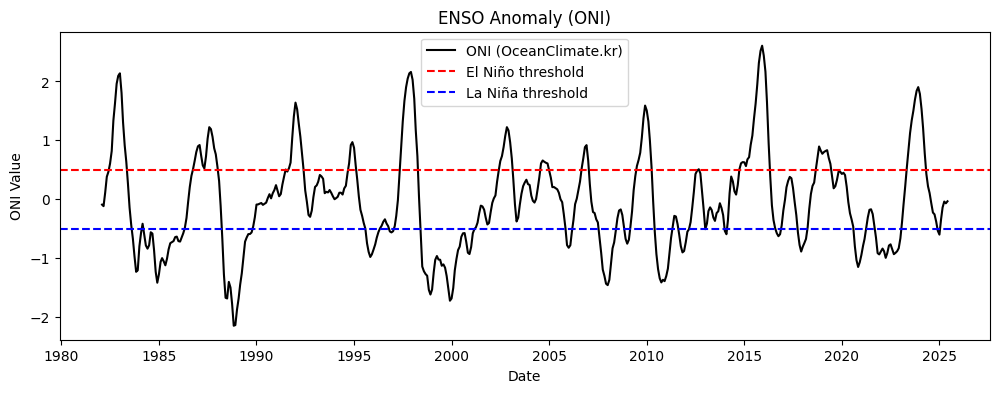

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHub raw URL로 CSV 불러오기
url = "https://raw.githubusercontent.com/edukosm/enso_colab_course/refs/heads/main/oni_month_20250821.csv"
enso = pd.read_csv(url, encoding='utf-8-sig')

# BOM 제거 (혹시 남아있을 경우)
enso['날짜'] = enso['날짜'].str.replace('\ufeff', '', regex=False)

# 날짜 컬럼을 datetime으로 변환
enso['date'] = pd.to_datetime(enso['날짜'], format='%Y년 %m월')

# 인덱스 설정
enso.set_index('date', inplace=True)

# 컬럼명 영문으로 변경
enso.rename(columns={
    '날짜': 'date_str',
    'nino3.4 index': 'nino34_index',
    'ONI index': 'ONI',
    'nino3.4 수온 평균': 'nino34_temp',
    'nino3.4 수온 평균(3개월)': 'nino34_temp_3mo',
    'nino3.4 수온 평년평균': 'nino34_climatology',
    'nino3.4 수온 표준편차': 'nino34_std'
}, inplace=True)

# 데이터 확인
print(enso.head())

# 시각화
plt.figure(figsize=(12, 4))
plt.plot(enso.index, enso['ONI'], label='ONI (OceanClimate.kr)', color='black')
plt.axhline(0.5, color='r', linestyle='--', label='El Niño threshold')
plt.axhline(-0.5, color='b', linestyle='--', label='La Niña threshold')
plt.legend()
plt.title('ENSO Anomaly (ONI)')
plt.xlabel('Date')
plt.ylabel('ONI Value')
plt.show()